In [1]:
import pandas as pd

df_manggarai = pd.read_csv('118_2024.csv')
df_depok = pd.read_csv('122_2024.csv')

In [2]:
df_manggarai.shape

(5006, 3)

In [3]:
df_manggarai

,118,2023-11-24 00:00:00,103
0,118,2023-11-24 00:10:00,102
1,118,2023-11-24 00:20:00,102
2,118,2023-11-24 00:30:00,102
3,118,2023-11-24 00:40:00,101
4,118,2023-11-24 00:50:00,101
...,...,...,...
5001,118,2023-12-31 23:20:00,114
5002,118,2023-12-31 23:30:00,114
5003,118,2023-12-31 23:40:00,114
5004,118,2023-12-31 23:50:00,114


In [4]:
df_depok.shape

(4841, 3)

In [5]:
df_depok

,122,2023-11-24 00:00:00,660
0,122,2023-11-24 00:10:00,659
1,122,2023-11-24 00:20:00,658
2,122,2023-11-24 00:30:00,658
3,122,2023-11-24 00:40:00,657
4,122,2023-11-24 00:50:00,657
...,...,...,...
4836,122,2023-12-31 23:20:00,646
4837,122,2023-12-31 23:30:00,648
4838,122,2023-12-31 23:40:00,652
4839,122,2023-12-31 23:50:00,655


In [6]:
df_manggarai.columns = ['ids', 'start_date', 'tma']

In [7]:
df_manggarai

,ids,start_date,tma
0,118,2023-11-24 00:10:00,102
1,118,2023-11-24 00:20:00,102
2,118,2023-11-24 00:30:00,102
3,118,2023-11-24 00:40:00,101
4,118,2023-11-24 00:50:00,101
...,...,...,...
5001,118,2023-12-31 23:20:00,114
5002,118,2023-12-31 23:30:00,114
5003,118,2023-12-31 23:40:00,114
5004,118,2023-12-31 23:50:00,114


In [8]:
df_depok.columns = ['ids', 'start_date', 'tma']

In [9]:
df_depok

,ids,start_date,tma
0,122,2023-11-24 00:10:00,659
1,122,2023-11-24 00:20:00,658
2,122,2023-11-24 00:30:00,658
3,122,2023-11-24 00:40:00,657
4,122,2023-11-24 00:50:00,657
...,...,...,...
4836,122,2023-12-31 23:20:00,646
4837,122,2023-12-31 23:30:00,648
4838,122,2023-12-31 23:40:00,652
4839,122,2023-12-31 23:50:00,655


In [10]:
# concat / merge
data = pd.concat([df_manggarai, df_depok])
data.shape

(9847, 3)

In [11]:
# manggarai
batas_siaga_1_manggarai = 950
batas_siaga_2_manggarai = 850
batas_siaga_3_manggarai = 750

# hitung probabilitas
prob_siaga_1_manggarai = len(data[(data['ids'] == 122) & (data['tma'] > batas_siaga_1_manggarai)]) / len(data[(data['ids'] == 122)])
prob_siaga_2_manggarai = len(data[(data['ids'] == 122) & (data['tma'] == batas_siaga_2_manggarai)]) / len(data[(data['ids'] == 122)])
prob_siaga_3_manggarai = len(data[(data['ids'] == 122) & (data['tma'] == batas_siaga_3_manggarai)]) / len(data[(data['ids'] == 122)])
prob_normal_manggarai = len(data[(data['ids'] == 122) & (data['tma'] < batas_siaga_3_manggarai)]) / len(data[(data['ids'] == 122)])


In [12]:
print(f"Probabilitas Siaga 1 (tingkat tinggi muka air > 950): {prob_siaga_1_manggarai:.2%}")
print(f"Probabilitas Siaga 2 (tingkat tinggi muka air = 850): {prob_siaga_2_manggarai:.2%}")
print(f"Probabilitas Siaga 3 (tingkat tinggi muka air = 750): {prob_siaga_3_manggarai:.2%}")
print(f"Probabilitas normal (tingkat tinggi muka air < 750): {prob_normal_manggarai:.2%}")

Probabilitas Siaga 1 (tingkat tinggi muka air > 950): 0.00%
Probabilitas Siaga 2 (tingkat tinggi muka air = 850): 0.00%
Probabilitas Siaga 3 (tingkat tinggi muka air = 750): 0.12%
Probabilitas normal (tingkat tinggi muka air < 750): 97.77%


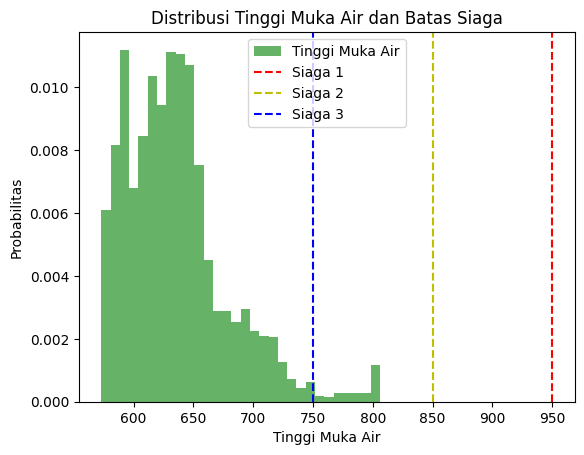

In [14]:
import matplotlib.pyplot as plt

# Menentukan batas untuk setiap status siaga
batas_siaga_1_manggarai = 950
batas_siaga_2_manggarai = 850
batas_siaga_3_manggarai = 750

# Memfilter data tinggi muka air untuk ids == 122 (manggarai)
tinggi_muka_air_manggarai = data[data['ids'] == 122]['tma']

# Membuat histogram dengan memperhitungkan probabilitas untuk setiap status siaga
plt.hist(tinggi_muka_air_manggarai, bins=30, density=True, alpha=0.6, color='g', label='Tinggi Muka Air')

# Menambahkan garis vertikal untuk batas siaga
plt.axvline(x=batas_siaga_1_manggarai, color='r', linestyle='--', label='Siaga 1')
plt.axvline(x=batas_siaga_2_manggarai, color='y', linestyle='--', label='Siaga 2')
plt.axvline(x=batas_siaga_3_manggarai, color='b', linestyle='--', label='Siaga 3')

# Menambahkan label dan judul
plt.xlabel('Tinggi Muka Air')
plt.ylabel('Probabilitas')
plt.title('Distribusi Tinggi Muka Air dan Batas Siaga')
plt.legend()

# Menampilkan plot
plt.show()